<a href="https://colab.research.google.com/github/lfarlima/Project-2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports and Dependencies 

In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 12.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=98ae46499a4a77664d2b2938cd0b82cc471ec644f547dc0c3a89ebe725969fde
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
!pip install ibm_watson

     |████████████████████████████████| 389kB 8.2MB/s 
     |████████████████████████████████| 204kB 14.2MB/s 
  Created wheel for ibm-watson: filename=ibm_watson-5.1.0-cp37-none-any.whl size=375439 sha256=218509c8cbf4fad51e9b4b57b96c686714954aa30552d8ca01e9490bfa433b18
  Stored in directory: /root/.cache/pip/wheels/49/6d/cf/1d91261b96363da78bf9b02699fd2262e6b5dad179500690c1
  Created wheel for ibm-cloud-sdk-core: filename=ibm_cloud_sdk_core-3.9.0-cp37-none-any.whl size=59612 sha256=38e04d735a3cf508bcf08efe19acc6a4628465eb46b66b3548abe02bf6f967fc
  Stored in directory: /root/.cache/pip/wheels/a2/23/f2/ae9db79b4234ed0fc74bf00bc97bcd16440ab2764c5f443167
Successfully built ibm-watson ibm-cloud-sdk-core


In [1]:
#imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer
from datetime import datetime, date, time, timezone
import yfinance as yf # Stock data
from numpy.random import seed
seed (1)
from tensorflow import random
random.set_seed(2)
import newsapi as NewsApiClient

from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import json
from pandas import json_normalize

# Code to download corpora
import nltk
nltk.download('wordnet')
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')


lemmatizer = WordNetLemmatizer()

api_key = "0ef1c61926f54984abcca4338225fd66"

# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Get the Tone Analyzer API Key and URL
tone_api = "zFumggLvdanjWjbKKqYfOetZc3Nu1PAaVJHVmc5FRt8t"

tone_url = "https://api.us-south.tone-analyzer.watson.cloud.ibm.com/instances/300fde5a-3dd1-4864-8a3d-1b8b626f35a9"

# Initialize Tone Analyser Client
# Create authentication object
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
authenticator = IAMAuthenticator(tone_api)
from ibm_watson import ToneAnalyzerV3

# Create tone_analyzer instance
tone_analyzer = ToneAnalyzerV3(
    version="2017-09-21",
    authenticator=authenticator
)

# Set the service endpoint
tone_analyzer.set_service_url(tone_url)

[nltk_data] Downloading package wordnet to /Users/lauren/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to /Users/lauren/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lauren/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/lauren/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lauren/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Twitter Tweet's VADER sentiment analysis 

In [2]:
api_key = '0ef1c61926f54984abcca4338225fd66'
newsapi = NewsApiClient(api_key=api_key)

TypeError: 'module' object is not callable

In [ ]:
## This section is for proof of work. Not meant to be run

# pip install nest_asyncio

# pip install --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

# import twint
# import nest_asyncio
# nest_asyncio.apply()
# c= twint.Config()
# c.Search= "$DOT" or "DOT.X"
# c.Since= "2020-09-29"
# c.Until = '2021-04-04'
# # c.Limit= 1000
# c.Lang= "en"
# c.Store_csv= True
# c.Output= "Search.csv"

# twint.run.Search(c)


# df = pd.read_csv('Search.csv', encoding="utf-8-sig")
# df= df[["id", "created_at", "tweet", "language"]]
# df=df.loc[df["language"]=="en"]
# df=df.rename(columns={"id": "ID", "created_at": "Date", "tweet": "Tweet"})
# df=df.drop(["language"], axis=1)
# #need to standardize time 
# # df=df.set_index("Date")
# df.shape

In [3]:
## NEED TO UPLOAD FILES INSTEAD
# import local csv to colab
# from google.colab import files
# uploaded = files.upload()


#Meant to be used for jupyter notebook 
pltr_twitter_df = pd.read_csv('pltr_twitter_df.csv', parse_dates=True, infer_datetime_format=True)

/Users/lauren/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [75]:
pltr_twitter_df=pltr_twitter_df.sort_values('Date')
pltr_twitter_df['Date'] = pd.to_datetime(pltr_twitter_df['Date']).dt.date
pltr_twitter_df.drop_duplicates()
pltr_twitter_df.head()

,Date,ID,Tweet
304526,2020-09-29,1310733546969952256,Don’t forget buy $PLTR tomorrow. Don’t sleep
304401,2020-09-29,1311050641431654400,$PLTR PALANTIR SETS REFERENCE PRICE FOR DIRECT...
304400,2020-09-29,1311050921728671745,$PLTR reference price $7.25
304399,2020-09-29,1311051212842848256,WHAT? $7.25? Demand remains strong....cough......
304398,2020-09-29,1311051738900824064,"Form 8-K: – On September 29, 2020, Palantir Te..."


In [76]:
# Function to calculate sentiment based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1
    return result

In [78]:
## FOR PROOF OF WORK

# pltr_twtr_sentiments = []

# for index, row in pltr_twitter_df.iterrows():
#     try:
#         text = row["Tweet"]
#         date = row["Date"]
#         sentiment = analyzer.polarity_scores(text)
#         compound = sentiment["compound"]
#         pos = sentiment["pos"]
#         neu = sentiment["neu"]
#         neg = sentiment["neg"]
#         pol=  get_sentiment(compound)
        
#         pltr_twtr_sentiments.append({
#             "text": text,
#             "date": date,
#             "compound": compound,
#             "positive": pos,
#             "negative": neg,
#             "neutral": neu,
#             "Polarity Score":pol
            
#         })
        
#     except AttributeError:
#         pass



In [77]:
pltr_twitter_sentiment_df = pd.read_csv('pltr_twitter_sentiment_df.csv', parse_dates=True, infer_datetime_format=True)
pltr_twitter_sentiment_df.drop_duplicates(inplace=True)
pltr_twitter_sentiment_df.tail()

,date,text,compound,positive,negative,neutral,Polarity Score
441521,2021-04-03 23:46:50 UTC,Watchlist: 1. $NNOX 2. $SOS 3. $BAC 4. $PLTR ...,0.5374,0.108,0.0,0.892,1
441524,2021-04-03 23:48:55 UTC,$PLTR could get a boost with $FB leaking user ...,0.4019,0.213,0.0,0.787,1
441527,2021-04-03 23:55:58 UTC,@thetradingchick Didn’t know you were in $PLTR...,0.6049,0.183,0.0,0.817,1
441530,2021-04-03 23:57:57 UTC,@GeniusStocks @alexcutler247 @gurgavin @SpacBo...,0.2732,0.080,0.0,0.920,1
441533,2021-04-03 23:59:27 UTC,"$PLTR Bullish count leading into Demo day, bea...",0.5994,0.196,0.0,0.804,1


In [78]:
pltr_twitter_sentiment_df=pltr_twitter_sentiment_df.sort_values('date')
pltr_twitter_sentiment_df['date'] = pd.to_datetime(pltr_twitter_sentiment_df['date']).dt.date
pltr_twitter_sentiment_df.set_index('date',inplace=True)
pltr_twitter_sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136203 entries, 2020-09-29 to 2021-04-03
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   text            136203 non-null  object 
 1   compound        136203 non-null  float64
 2   positive        136203 non-null  float64
 3   negative        136203 non-null  float64
 4   neutral         136203 non-null  float64
 5   Polarity Score  136203 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.3+ MB


In [27]:
# import pltr_twitter_sentiment_df csv to colab
# pltr_twitter_sentiment_df = pd.DataFrame(pltr_twtr_sentiments)
# pltr_twitter_sentiment_df.info()


In [79]:
#CALCULATE AVERAGE
twitter_sent_avg = pltr_twitter_sentiment_df.groupby('date', as_index=True, sort=True)['compound','positive','negative','neutral','Polarity Score'].mean()
twitter_sent_avg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 2020-09-29 to 2021-04-03
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   compound        187 non-null    float64
 1   positive        187 non-null    float64
 2   negative        187 non-null    float64
 3   neutral         187 non-null    float64
 4   Polarity Score  187 non-null    float64
dtypes: float64(5)
memory usage: 8.8+ KB
<ipython-input-79-5eb92d7a8b51>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  twitter_sent_avg = pltr_twitter_sentiment_df.groupby('date', as_index=True, sort=True)['compound','positive','negative','neutral','Polarity Score'].mean()


<AxesSubplot:xlabel='Polarity Score'>

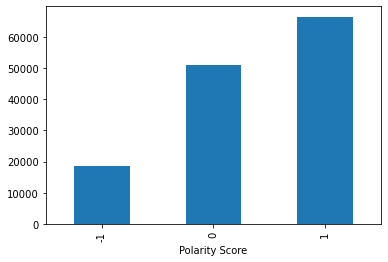

In [29]:
# Graph tallied Polarity Score 
pltr_twitter_sentiment_df.groupby('Polarity Score').size().plot(kind='bar')

## Pull data from Newsapi and run VADER analysis

In [10]:
# ## THIS IS FOR PROOF OF WORK. DOES NOT RUN ON COLAB

# pltr_headlines = newsapi.get_everything(
#     q="PLTR",
#     language="en",
#     page_size=10,
#     sort_by="relevancy",
#     from_param="2021-02-29"
# )

# pltr_newsapi_df = pd.DataFrame.from_dict(pltr_headlines["articles"])
# pltr_newsapi_df.head()

In [30]:
 # Transform the response dictionary to a DataFrame
pltr_newsapi_df = pd.read_csv('Newsapi.csv')

pltr_newsapi_df.head()

,Unnamed: 0,source,author,title,description,url,urlToImage,publishedAt,content
0,0,"{'id': None, 'name': 'Benzinga'}",Tyler Bundy,Palantir Stock Trades Higher: A Technical Anal...,Palantir Technology Inc. (NYSE:PLTR) shares we...,https://www.benzinga.com/trading-ideas/long-id...,https://cdn2.benzinga.com/files/imagecache/og_...,2021-03-25T19:06:00Z,Palantir Technology Inc. (NYSE:PLTR) shares we...
1,1,"{'id': 'business-insider', 'name': 'Business I...",Emily Graffeo,Palantir jumps after securing 5-year contract ...,Summary List PlacementShares of Palantir gaine...,https://www.businessinsider.com/palantir-stock...,https://i.insider.com/605213680347cb00184b63a3...,2021-04-05T13:16:57Z,Shares of Palantir gained 3.47% early Monday a...
2,2,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,Former Credit Suisse exec backed SPAC to take ...,Sarcos Robotics Inc said on Tuesday it will go...,https://www.reuters.com/article/us-sarcos-m-a-...,https://s1.reutersmedia.net/resources_v2/image...,2021-04-06T10:53:00Z,By Reuters Staff\r\n(Reuters) - Sarcos Robotic...
3,3,"{'id': None, 'name': 'Slashdot.org'}",BeauHD,Coinbase Sets Direct Listing For April 14,"Coinbase, the largest U.S. cryptocurrency exch...",https://slashdot.org/story/21/04/01/2124242/co...,https://a.fsdn.com/sd/topics/bitcoin_64.png,2021-04-02T01:25:00Z,The company's registration statement for the l...
4,4,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,Breakingviews - Capital Calls - Cellebrite goo...,SOMETHING TO CELLEBRITE. Controversy over cops...,https://www.reuters.com/article/us-global-fina...,https://static.reuters.com/resources/r/?m=02&d...,2021-04-08T19:41:00Z,By Reuters Staff\r\nA Cellebrite forensic devi...


In [12]:
pltr_sentiments = []

for index, row in pltr_newsapi_df.iterrows():
    try:
        text = row["content"]
        date = row["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        pol=  get_sentiment(compound)
        
        pltr_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "Polarity Score":pol
            
        })
        
    except AttributeError:
        pass

In [13]:
# Create DataFrame
pltr_newsapi_sentiment_df = pd.DataFrame(pltr_sentiments)

# Reorder DataFrame columns
pltr_newsapi_sentiment_df=pltr_newsapi_sentiment_df.sort_values('date')
pltr_newsapi_sentiment_df['date'] = pd.to_datetime(pltr_newsapi_sentiment_df['date']).dt.date
pltr_newsapi_sentiment_df.set_index('date',inplace=True)
pltr_newsapi_sentiment_df.head()

,text,compound,positive,negative,neutral,Polarity Score
date,,,,,,
2021-03-10,As we move into the vaccination phase of the C...,0.4939,0.135,0.000,0.865,1
2021-03-10,"In this video, I will talk about the five stoc...",0.7003,0.167,0.000,0.833,1
2021-03-10,Overview\r\n After an unprecedented rally in h...,0.0000,0.000,0.000,1.000,0
2021-03-10,Net Asset Value of $15.14 per Share as of Dece...,0.8934,0.305,0.000,0.695,1
2021-03-11,Image source: The Motley Fool.\r\nSuRo Capital...,-0.4404,0.000,0.108,0.892,-1


In [14]:
### CALCULATE AVERAGE BY DATE
newsapi_sent_avg = pltr_newsapi_sentiment_df.groupby('date', as_index=True, sort=True)['compound','positive','negative','neutral','Polarity Score'].mean()
newsapi_sent_avg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 2021-03-10 to 2021-04-10
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   compound        29 non-null     float64
 1   positive        29 non-null     float64
 2   negative        29 non-null     float64
 3   neutral         29 non-null     float64
 4   Polarity Score  29 non-null     float64
dtypes: float64(5)
memory usage: 1.4+ KB
<ipython-input-14-aeabffa4703c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  newsapi_sent_avg = pltr_newsapi_sentiment_df.groupby('date', as_index=True, sort=True)['compound','positive','negative','neutral','Polarity Score'].mean()


<AxesSubplot:xlabel='Polarity Score'>

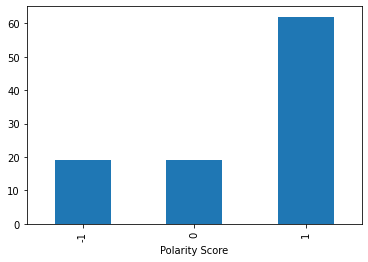

In [15]:
# Graph tallied Polarity Score 
pltr_newsapi_sentiment_df.groupby('Polarity Score').size().plot(kind='bar')

## Yahoo Finance Stock API 

In [16]:
# Load PLTR stock closing prices from YFinance
pltr_yf = yf.download('PLTR',
                       start='2020-01-01',
                       end='2021-05-31',
                       progress=False,
                    #    index_col ='Date',
                       infer_datetime_format= True,
                       parse_dates = True,
                       interval='1d'

)
# Create DataFrame
pltr_yf_df = pd.DataFrame(pltr_yf)
pltr_yf_df.reset_index(inplace=True)
# Reorder DataFrame columns
pltr_yf_df=pltr_yf_df.sort_values('Date')
# pltr_yf_df['Date'] = pd.to_datetime(pltr_yf_df['Date']).dt.date
pltr_yf_df.set_index('Date',inplace=True)
pltr_yf_df.head()


# set_index(pltr_yf_df['Date']).to_datetime().dt.date
pltr_yf_df.drop(columns=['Open','High','Low','Volume','Adj Close'],inplace=True)
pltr_yf_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2020-09-30 to 2021-04-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [17]:
## Add another combined df here 
pltr_yf_newsapi = pd.concat([pltr_yf_df,newsapi_sent_avg],axis=1,join='outer')
pltr_yf_newsapi.dropna(inplace=True)
pltr_yf_newsapi.head()
# combined_sent_df = pd.read_csv('/content/pltr_twitter_df.csv')

,Close,compound,positive,negative,neutral,Polarity Score
2021-03-10,24.750000,0.521900,0.15175,0.000000,0.848250,0.750000
2021-03-11,26.730000,-0.071825,0.01925,0.042000,0.938750,0.000000
2021-03-12,26.920000,0.000000,0.00000,0.000000,1.000000,0.000000
2021-03-15,26.790001,0.054700,0.06800,0.057667,0.874333,0.333333
2021-03-16,25.610001,0.513567,0.14500,0.020000,0.835000,1.000000


In [18]:
pltr_yf_newsapi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2021-03-10 to 2021-04-09
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           22 non-null     float64
 1   compound        22 non-null     float64
 2   positive        22 non-null     float64
 3   negative        22 non-null     float64
 4   neutral         22 non-null     float64
 5   Polarity Score  22 non-null     float64
dtypes: float64(6)
memory usage: 1.2 KB


In [34]:
pltr_yf_twitter = pd.concat([pltr_yf_df,twitter_sent_avg],axis=1,join='outer')
# pltr_yf_twitter.dropna(inplace=True)
pltr_yf_twitter.dropna(inplace=True)
pltr_yf_twitter.head()

,Close,compound,positive,negative,neutral,Polarity Score
2021-03-26,22.580000,0.214786,0.099105,0.030113,0.870781,0.404396
2021-03-29,21.730000,0.199909,0.088314,0.028253,0.883424,0.406758
2021-03-30,22.040001,0.192123,0.098475,0.038478,0.863038,0.326988
2021-03-31,23.290001,0.237148,0.111827,0.026785,0.861372,0.414039
2021-04-01,23.070000,0.214208,0.095592,0.029560,0.874848,0.386782


In [35]:
pltr_yf_twitter.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127 entries, 2020-09-30 to 2021-04-01
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           127 non-null    float64
 1   compound        127 non-null    float64
 2   positive        127 non-null    float64
 3   negative        127 non-null    float64
 4   neutral         127 non-null    float64
 5   Polarity Score  127 non-null    float64
dtypes: float64(6)
memory usage: 6.9 KB


<AxesSubplot:>

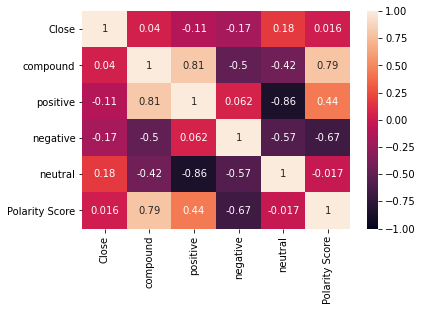

In [36]:
import seaborn as sns

newsapi_yf_corr = pltr_yf_newsapi.corr()
sns.heatmap(newsapi_yf_corr,vmin=-1,vmax=1,annot=True)

<AxesSubplot:>

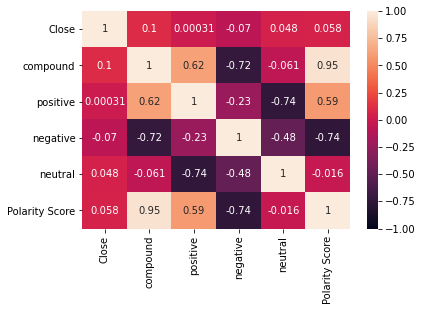

In [43]:
twitter_yf_corr = pltr_yf_twitter.corr()
sns.heatmap(twitter_yf_corr,vmin=-1,vmax=1,annot=True)

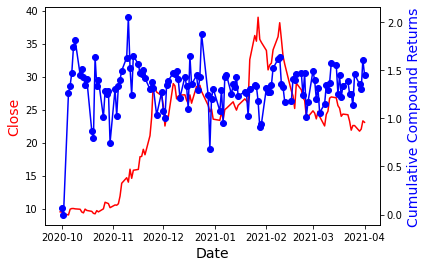

In [60]:
all_returns = pltr_yf_twitter["compound"].pct_change()
cumulative_return2= (1 + all_returns).cumprod()
pltr_yf_twitter['CumReturn'] = cumulative_return2
# cumulative_return2.plot()


fig, ax =plt.subplots()
ax.plot(pltr_yf_twitter.index, pltr_yf_twitter.Close, color="red")
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Close", color='red',fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(pltr_yf_twitter.index, cumulative_return2,color="blue",marker="o")
ax2.set_ylabel("Cumulative Compound Returns",color="blue",fontsize=14)
plt.show()
# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')

<AxesSubplot:>

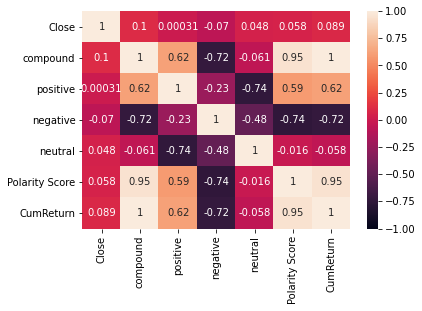

In [62]:
# pltr_yf_twitter.head()
twitter_yf_corr = pltr_yf_twitter.corr()
sns.heatmap(twitter_yf_corr,vmin=-1,vmax=1,annot=True)

## VADER Sentiments WordCloud 

In [68]:
df = pltr_twitter_sentiment_df["Polarity Score"]  ## WHAT IS THIS LINE FOR???
#pltr_twitter_sentiment_df[pltr_twitter_sentiment_df["Polarity Score"]=='-1']
words = ' '.join(pltr_twitter_sentiment_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
stopwords = set(STOPWORDS)
stopwords.add("PLTR")
stopwords.add("Palantir")

twitter_wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

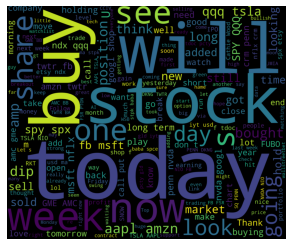

In [70]:
plt.figure(1,figsize=(5, 5))
plt.imshow(twitter_wordcloud)
plt.axis('off')
plt.show()

In [71]:
### NEWSAPI WORDCLOUD
df = pltr_newsapi_sentiment_df["Polarity Score"]  ## WHAT IS THIS LINE FOR???
#pltr_twitter_sentiment_df[pltr_twitter_sentiment_df["Polarity Score"]=='-1']
words = ' '.join(pltr_newsapi_sentiment_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
stopwords = set(STOPWORDS)
stopwords.add("PLTR")
stopwords.add("Palantir")

newsapi_wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

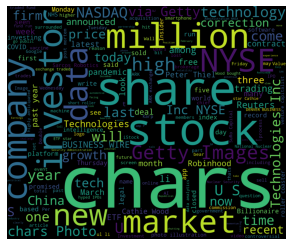

In [74]:
plt.figure(1,figsize=(5, 5))
plt.imshow(newsapi_wordcloud)
plt.axis('off')
plt.show()

## VADER COMBINED DATAFRAME

In [80]:
## WE NEED TO DOUBLE CHECK THIS

pltr_sent_df= pd.concat([pltr_twitter_df, pltr_newsapi_df], axis='columns' join="inner", ignore_index=True)

SyntaxError: invalid syntax (<ipython-input-80-9f254e967cd0>, line 2)

## IBM WATSON TONE ANALYSIS - TWITTER AND NEWSAPI

In [ ]:
# CALCULATE DAILY POLARITY SCORES
# COMBINE INTO PLTR_TONE_DF
## pltr_combined_tone_df= pd.concat([pltr_twitter_tone_df, pltr_newsapi_tone_df], join="0", ignore_index=True)




In [ ]:
# Define text to analyze
text = df["text"]

# Analyze the text's tone with the 'tone()' method.
tone_analysis = tone_analyzer.tone(
    {"text": text},
    content_type="application/json",
    content_language="en",
    accept_language="en",
).get_result()

# Display tone analysis results
print(json.dumps(tone_analysis, indent=2)) 

In [ ]:
# Document Tones
doc_tone_df = json_normalize(data=tone_analysis["document_tone"], record_path=["tones"])
doc_tone_df

In [ ]:
 # Sentences Tones
sentences_tone_df = json_normalize(
    data=tone_analysis["sentences_tone"],
    record_path=["tones"],
    meta=["sentence_id", "text"],
)
sentences_tone_df

## WHICH MODEL PRODUCES BETTER RESULTS? VADER v WATSON


##Graph Sentiment score and Stock Price

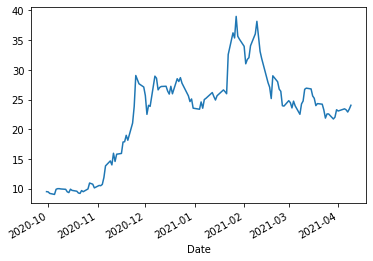

In [ ]:
pltr_yf_df["Close"].plot() 

In [ ]:
## COMBINE CLOSING PRICES WITH DAILY POLARITY SCORES (VADER)

# pltr_combined_df = Close + Polarity Scores (Index = Date)


## CHECK CORRELATIONS OF COMPOUND / POS / NEG / NEUTRAL / POLARITY SCORES (VADER)

##Graph Tone analysis score and Stock Price

In [ ]:
## COMBINE CLOSING PRICES WITH DAILY POLARITY SCORES (WATSON)

# pltr_combined_df = Close + Polarity Scores (Index = Date)


## CHECK CORRELATIONS OF COMPOUND / POS / NEG / NEUTRAL / POLARITY SCORES (WATSON)

## ML and LSTM Model 

In [ ]:
# Data Preprocessing for Twitter df 

# Creating the X and y vectors
X = pltr_combined_df["Close"].values # VADER v WATSON - which model do we use here?
y = pltr_combined_df["Polarity Score"].values

In [ ]:
 # Import Keras modules for data encoding
# from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
 # Padding sequences
X_pad = pad_sequences(X_seq, maxlen=140, padding="post")

In [ ]:
 # Creating training, validation, and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, random_state=0)


In [ ]:
 # Import Keras modules for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
# Model set-up
vocabulary_size = len(tokenizer.word_counts.keys()) + 1
max_words = 140
embedding_size = 64 

In [ ]:
 # Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))

# Layer 2
model.add(LSTM(units=280))

# Output layer
model.add(Dense(1, activation="sigmoid"))

In [ ]:
# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam"
)

In [ ]:
 # Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 140, 64)           7667008   
_________________________________________________________________
lstm (LSTM)                  (None, 280)               386400    
_________________________________________________________________
dense (Dense)                (None, 1)                 281       
Total params: 8,053,689
Trainable params: 8,053,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model
batch_size = 1000
model.fit(
    X_train,
    y_train,
    epochs=3, ## REDUCED EPOCHS FOR TESTING PURPOSES ONLY
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/10
332/332 [==============================] - 976s 3s/step - loss: 0.6574
Epoch 2/10
332/332 [==============================] - 952s 3s/step - loss: 0.6513
Epoch 3/10
332/332 [==============================] - 957s 3s/step - loss: 0.6500
Epoch 4/10
332/332 [==============================] - 1348s 4s/step - loss: 0.6506
Epoch 5/10
 59/332 [====>.........................] - ETA: 13:30 - loss: 0.6479

KeyboardInterrupt: 

In [ ]:
 # Predict classes using the testing data. (bath_size the smaller the better)
y_rnn_pred = model.predict_classes(X_test_rnn, batch_size=1000)

## Accuracy and Model Comparison

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score

print("RNN LSTM Accuracy %.2f" % (accuracy_score(y_test_rnn, y_rnn_pred)))

In [ ]:
#  Confusion Matrix

 from sklearn.metrics import confusion_matrix

 # Confusion matrtix metrics from the RNN LSTM model
tn_rnn, fp_rnn, fn_rnn, tp_rnn = confusion_matrix(y_test_rnn, y_rnn_pred).ravel()

# Dataframe to display confusion matrix from the RNN LSTM model
cm_rnn_df = pd.DataFrame(
    {
        "Positive(1)": [f"TP={tp_rnn}", f"FP={fp_rnn}"],
        "Negative(0)": [f"FN={fn_rnn}", f"TN={tn_rnn}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
cm_rnn_df.index.name = "Actual"
cm_rnn_df.columns.name = "Predicted"
print("Confusion Matrix from the RNN LSTM Model")
display(cm_rnn_df)

## Classification Report 

In [ ]:
# Import the classification_report method from sklearn
from sklearn.metrics import classification_report

# Display classification report for the RNN LSTM Model
print("Classification Report for the RNN LSTM Model")
print(classification_report(y_rnn_pred, y_test_rnn))

## Plotting the ROC Curve

In [ ]:
 # Import the roc_curve and auc metrics from sklearn
from sklearn.metrics import roc_curve, auc

 # Making predictions to feed the roc_curve module
test_predictions_rnn = model.predict(X_test_rnn, batch_size=1000)

In [ ]:
 # Data for ROC Curve - RNN LSTM Model
fpr_test_rnn, tpr_test_rnn, thresholds_test_rnn = roc_curve(y_test_rnn, test_predictions_rnn)

In [ ]:
# AUC for the RNN LSTM Model
auc_test_rnn = auc(fpr_test_rnn, tpr_test_rnn)
auc_test_rnn = round(auc_test_rnn, 4)

In [ ]:
roc_df_test_rnn = pd.DataFrame({"FPR Test": fpr_test_rnn, "TPR Test": tpr_test_rnn,})

In [ ]:
roc_df_test_rnn.plot(
    x="FPR Test",
    y="TPR Test",
    color="blue",
    style="--",
    xlim=([-0.05, 1.05]),
    title=f"Test ROC Curve (AUC={auc_test_rnn})",
)

##  Making Predictions

In [ ]:
# Make some predictions
predicted = model.predict(X_test)

 # Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = df.index[-len(real_prices): ])
stocks.head()

In [ ]:
# Plot the real vs predicted prices as a line chart
stocks.plot()